Вступ

У даній роботі буде експерименти які наведенні у даній статті [Smart Web Service of Ti-Based Alloy’s Quality Evaluation for Medical Implants Manufacturing](https://www.mdpi.com/2076-3417/12/10/5238).

У сттаті використані клдасичні методи машинного навчання, а саме Логістична регресія (Logistic regression), Метод опорних векторів (Support vector machine), а також ймовірнісна нейронна мережа (Probabilistic neural network), і її різновиди поліпшення з використання SVM та поліпшення.

Для дослідження даних моделей було використано власний датасет, для класифікації якості сплавів 4 класи (від поганого до чудового). Стаття була опублікована без коду і датасету, проте автори радо поділилися зі мною другим.

У даному юпітер ноутбуці буде виконанна наступна робота:

1. Відтворення експерименту статті

2. Покращення експерименту

3. Застосування додаткового методу (на вибір)


# 0. Підвантаження бібліотек

In [146]:
from __future__ import print_function

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import time

import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load data from CSV using pandas
train_data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/data/MTestData.txt', header=None)

# The target column is named 20
X_train = train_data.drop(20, axis=1)
y_train = train_data[20]

X_test = test_data.drop(20, axis=1)
y_test = test_data[20]

Mounted at /content/drive


In [4]:

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# 1-2. Відтворення експерименту статті та покращення експерименту

Об'єднання тестових даних із навчальними для кросвалідації

In [42]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
train_data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/data/MTestData.txt', header=None)

train_data.columns = train_data.columns.astype(str)
test_data.columns = test_data.columns.astype(str)

X_train = train_data.drop('20', axis=1)
y_train = train_data['20']

X_test = test_data.drop('20', axis=1)
y_test = test_data['20']

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

### Логістична регресія (Logistic Regression) 0.7105

In [15]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710465 using {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.701871 (0.051047) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.696875 (0.048601) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.701658 (0.051090) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.696875 (0.049045) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.694783 (0.053686) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.701871 (0.051301) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.704171 (0.051040) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.696250 (0.048044) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.704379 (0.050587) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.696042 (0.048307) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.710465 (0.045650) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.704171 (0.051040) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.700403 (0.048094) with: {'C': 1.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Отже, найкраща точність 71.05 % при використання наступних гіпер параметрів:

1.   Зворотна сила регуляризації: 10
2.   Штраф (penalty) = 'l2'
3.   Алгоритм для використання в задачі оптимізації (solver)  = 'sag'

У статі зазначена куди менша точність що свідчить про не достатню кількість експериментів з боку, науковців у цій тематиці.



### Метод опорних векторів (Support vector machine) 0.99875

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [29]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid', 'linear']
C = [100, 50, 10, 1.0, 0.1, 0.01]
gamma = ['scale', 'auto']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998750 using {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
0.998750 (0.009233) with: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
0.998542 (0.010314) with: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.555962 (0.062377) with: {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.799738 (0.049211) with: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.930235 (0.040305) with: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}
0.998542 (0.010314) with: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.776600 (0.048916) with: {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.799738 (0.049211) with: {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.998750 (0.009233) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.998542 (0.010314) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.554060 (0.061158) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.799113 (0.049178) with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.845284 (0.047565) with: {'C': 50, 'gamma': 'auto',

Отже, найкраща точність 99.88% при використання наступних гіпер параметрів:

1.   Параметр регуляризації ('C') = 100
2.   Ядерний коефіцієнт ('gamma') = 'scale'
3.   Тип ядра ('kernel')  = 'poly'

У статі зазначена 76% та 74%, це на 20% менша точність, ніж та що отримана у нас в результаті пошуку найкращих гіперпараметрів.

### Гребневий класифікатор  Ridge classifier 0.688963 *

In [68]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

In [69]:
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.688963 using {'alpha': 0.2}
0.688754 (0.047681) with: {'alpha': 0.1}
0.688963 (0.047263) with: {'alpha': 0.2}
0.688963 (0.047263) with: {'alpha': 0.3}
0.688963 (0.047355) with: {'alpha': 0.4}
0.688958 (0.047391) with: {'alpha': 0.5}
0.688958 (0.047391) with: {'alpha': 0.6}
0.688958 (0.047391) with: {'alpha': 0.7}
0.688542 (0.047219) with: {'alpha': 0.8}
0.688542 (0.047767) with: {'alpha': 0.9}
0.688542 (0.047767) with: {'alpha': 1.0}


При використанні RidgeClassifier отримали найвищу точність у 0.688963

### Випадковий ліс Random Forest Classifier 0.986082 *

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [71]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.986082 using {'max_features': 'log2', 'n_estimators': 1000}
0.933274 (0.043799) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.981191 (0.028158) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.985358 (0.025920) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.932447 (0.048714) with: {'max_features': 'log2', 'n_estimators': 10}
0.980482 (0.028521) with: {'max_features': 'log2', 'n_estimators': 100}
0.986082 (0.027105) with: {'max_features': 'log2', 'n_estimators': 1000}


Випадковий ліс також справився чудово із поставленою задачею

### Ймовірнісна нейронна мережа (Probabilistic neural network) 0.885

Код взято із: https://github.com/verowulf/PNN/blob/master/PNN.ipynb

Quick answer what is PNN
https://youtu.be/uAKu4g7lBxU?si=WS19JaPf_yjfWmBq

In [154]:
# Load data from CSV using pandas
train_data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/data/MTestData.txt', header=None)

X_train = train_data.drop(20, axis=1).astype(int).to_numpy()
y_train = train_data[20].astype(int).to_numpy() - 1

X_test = test_data.drop(20, axis=1).astype(int).to_numpy()
y_test = test_data[20].astype(int).to_numpy() - 1

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import numpy as np
import math
import numpy as np
import math

# Probabilistic Neural Network with 4 layers
class PNN(object):
    def __init__(self):
        self.L2 = []    # Layer 2 that holds the patterns
        print('Empty PNN created.')

    def train(self, X, y, p=2):
        self.n_ = X.shape[1]  # num of features
        self.p_ = p           # num of classes

        # Layer 2 (Pattern): Set up empty lists for each class
        for k in range(self.p_):
            self.L2.append([])    # Using Python's basic lists because ndarray cannot append empty arrays
                                  # Also perhaps we might have to input different data types

        # Enter patterns into Layer 2
        for i in range(X.shape[0]):
            self.L2[y[i]].append(X[i])

        self.L2 = np.array(self.L2)    # Change to ndarray for speed (Is this faster?)

        print('PNN with %d classes trained.' % self.p_)

    def crossValidate(self, X, y, sigma=0.5):
        result = self.predict(X, sigma)
        num_correct = sum(result[:, 0] == y)

        print('Cross validation accuracy with sigma %.2f: %.1f%%' % (sigma, num_correct/len(y) * 100))

    def predict(self, X, sigma=0.5):
        m = X.shape[0]
        accL3 = np.zeros((m, self.p_))
        accL4 = np.zeros(m)

        self.sigma_ = sigma    # smoothing parameter, not standard deviation
        self.C1_ = 2 * self.sigma_**2
        C2_ = (math.sqrt(2*math.pi) * self.sigma_) ** (- self.n_)

        # Layer 1 (Input): x
        for i in range(m):
            x = X[i]

            # Layer 3 (Averaging): for each class
            self.L3_ = np.zeros(self.p_)
            for k in range(self.p_):
                for ki in range(len(self.L2[k])):
                    self.L3_[k] += self._activation(x, self.L2[k][ki])
                self.L3_[k] /= len(self.L2[k])

                # Multiply constant
                self.L3_[k] *= C2_
                accL3[i][k] = self.L3_[k]

            # Layer 4 (Output/Decision): Maxing
            self.L4_ = self.L3_.argmax()
            accL4[i] = self.L4_

        return np.column_stack((accL4, accL3))

    def _activation(self, x, w):
        diff = x - w
        return math.exp( - np.dot(diff, diff) / self.C1_ )

pnn = PNN()
pnn.train(X_train, y_train, p=4)

begin = 0.01
end   = 1.00
step  = 0.01

s = begin
while s < end+step:
    pnn.crossValidate(X_test, y_test, sigma=s)
    s += step

Empty PNN created.
PNN with 4 classes trained.


<ipython-input-53-e9414b75d14d>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.L2 = np.array(self.L2)    # Change to ndarray for speed (Is this faster?)


Cross validation accuracy with sigma 0.01: 34.4%
Cross validation accuracy with sigma 0.02: 34.4%
Cross validation accuracy with sigma 0.03: 34.4%
Cross validation accuracy with sigma 0.04: 88.5%
Cross validation accuracy with sigma 0.05: 88.5%
Cross validation accuracy with sigma 0.06: 88.5%
Cross validation accuracy with sigma 0.07: 88.5%
Cross validation accuracy with sigma 0.08: 88.5%
Cross validation accuracy with sigma 0.09: 88.5%
Cross validation accuracy with sigma 0.10: 88.5%
Cross validation accuracy with sigma 0.11: 88.5%
Cross validation accuracy with sigma 0.12: 88.5%
Cross validation accuracy with sigma 0.13: 88.5%
Cross validation accuracy with sigma 0.14: 88.5%
Cross validation accuracy with sigma 0.15: 88.5%
Cross validation accuracy with sigma 0.16: 88.5%
Cross validation accuracy with sigma 0.17: 88.5%
Cross validation accuracy with sigma 0.18: 88.5%
Cross validation accuracy with sigma 0.19: 88.5%
Cross validation accuracy with sigma 0.20: 88.5%
Cross validation acc

In [54]:
pnn.crossValidate(X_test, y_test, sigma=10)

Cross validation accuracy with sigma 10.00: 53.1%


### Багатошаровий перцептрон (Multilayer perceptron) 0.977225 *

In [72]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [136]:
model = MLPClassifier()
solvers = ['lbfgs', 'adam', 'sgd']
max_iters=[1000]
hidden_layer_sizess=[(100, 20)]
alphas=[1e-5]
# define grid search
grid = dict(solver=solvers, max_iter=max_iters, hidden_layer_sizes=hidden_layer_sizess, alpha=alphas)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977225 using {'alpha': 1e-05, 'hidden_layer_sizes': (100, 20), 'max_iter': 1000, 'solver': 'lbfgs'}
0.977225 (0.017779) with: {'alpha': 1e-05, 'hidden_layer_sizes': (100, 20), 'max_iter': 1000, 'solver': 'lbfgs'}
0.977017 (0.017632) with: {'alpha': 1e-05, 'hidden_layer_sizes': (100, 20), 'max_iter': 1000, 'solver': 'adam'}
0.977017 (0.017632) with: {'alpha': 1e-05, 'hidden_layer_sizes': (100, 20), 'max_iter': 1000, 'solver': 'sgd'}


# PNN-Logit 0.885

https://github.com/verowulf/PNN/blob/master/PNN.ipynb

Quick answer what is PNN
https://youtu.be/uAKu4g7lBxU?si=WS19JaPf_yjfWmBq

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [80]:
# Load data from CSV using pandas
train_data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/data/MTestData.txt', header=None)

X_train = train_data.drop(20, axis=1).astype(int).to_numpy()
y_train = train_data[20].astype(int).to_numpy() - 1

X_test = test_data.drop(20, axis=1).astype(int).to_numpy()
y_test = test_data[20].astype(int).to_numpy() - 1

In [85]:
import numpy as np
import math

# Probabilistic Neural Network with 4 layers
class PNN(object):
    def __init__(self):
        self.L2 = []    # Layer 2 that holds the patterns
        print('Empty PNN created.')

    def train(self, X, y, p=2):
        self.n_ = X.shape[1]  # num of features
        self.p_ = p           # num of classes

        # Layer 2 (Pattern): Set up empty lists for each class
        for k in range(self.p_):
            self.L2.append([])    # Using Python's basic lists because ndarray cannot append empty arrays
                                  # Also perhaps we might have to input different data types

        # Enter patterns into Layer 2
        for i in range(X.shape[0]):
            self.L2[y[i]].append(X[i])

        self.L2 = np.array(self.L2)    # Change to ndarray for speed (Is this faster?)

        print('PNN with %d classes trained.' % self.p_)

    def crossValidate(self, X, y, sigma=0.5):
        result = self.predict(X, sigma)
        num_correct = sum(result[:, 0] == y)

        print('Cross validation accuracy with sigma %.2f: %.1f%%' % (sigma, num_correct/len(y) * 100))
        return result

    def predict(self, X, sigma=0.5):
        m = X.shape[0]
        accL3 = np.zeros((m, self.p_))
        accL4 = np.zeros(m)

        self.sigma_ = sigma    # smoothing parameter, not standard deviation
        self.C1_ = 2 * self.sigma_**2
        C2_ = (math.sqrt(2*math.pi) * self.sigma_) ** (- self.n_)

        # Layer 1 (Input): x
        for i in range(m):
            x = X[i]

            # Layer 3 (Averaging): for each class
            self.L3_ = np.zeros(self.p_)
            for k in range(self.p_):
                for ki in range(len(self.L2[k])):
                    self.L3_[k] += self._activation(x, self.L2[k][ki])
                self.L3_[k] /= len(self.L2[k])

                # Multiply constant
                self.L3_[k] *= C2_
                accL3[i][k] = self.L3_[k]

            # Layer 4 (Output/Decision): Maxing
            self.L4_ = self.L3_.argmax()
            accL4[i] = self.L4_

        return np.column_stack((accL4, accL3))

    def _activation(self, x, w):
        diff = x - w
        return math.exp( - np.dot(diff, diff) / self.C1_ )


# Normalize to unit length: [0, 1]
# X must be ndarray
def Normalize(X):
    x_max = X.max(axis=0)
    x_min = X.min(axis=0)
    return (X - x_min) / (x_max - x_min)

In [ ]:
pnn = PNN()
pnn.train(X_train, y_train, p = 4)

begin = 0.01
end   = 1.00
step  = 0.01

s = begin
while s < end+step:
    pnn.crossValidate(X_test, y_test, sigma=s)
    s += step

Cross validation accuracy with sigma 0.01: 34.4%
Cross validation accuracy with sigma 0.02: 34.4%
Cross validation accuracy with sigma 0.03: 34.4%
Cross validation accuracy with sigma 0.04: 88.5%
Cross validation accuracy with sigma 0.05: 88.5%
Cross validation accuracy with sigma 0.06: 88.5%
Cross validation accuracy with sigma 0.07: 88.5%
Cross validation accuracy with sigma 0.08: 88.5%
Cross validation accuracy with sigma 0.09: 88.5%
Cross validation accuracy with sigma 0.10: 88.5%
Cross validation accuracy with sigma 0.11: 88.5%
Cross validation accuracy with sigma 0.12: 88.5%
Cross validation accuracy with sigma 0.13: 88.5%
Cross validation accuracy with sigma 0.14: 88.5%
Cross validation accuracy with sigma 0.15: 88.5%
Cross validation accuracy with sigma 0.16: 88.5%
Cross validation accuracy with sigma 0.17: 88.5%
Cross validation accuracy with sigma 0.18: 88.5%
Cross validation accuracy with sigma 0.19: 88.5%
Cross validation accuracy with sigma 0.20: 88.5%
Cross validation acc

Дістаємо ймовірності із PNN і відкидаємо передбачення

Використовуємо ймовірності із нейронної мережі, як новий датасет для лінійної регресії

![picture](https://www.mdpi.com/applsci/applsci-12-05238/article_deploy/html/images/applsci-12-05238-g002-550.jpg)

In [158]:
X_logit_train = pnn.crossValidate(X_train, y_train, sigma=0.5)
X_logit_test = pnn.crossValidate(X_test, y_test, sigma=0.5)

# Take only probability
X_logit_train = X_logit_train[:,1:]
X_logit_test = X_logit_test[:,1:]

# Scaler doesnt help
# second_scaler = MinMaxScaler().fit(X_logit_train)
# X_logit_train = second_scaler.transform(X_logit_train)
# X_logit_test = second_scaler.transform(X_logit_test)

Cross validation accuracy with sigma 0.50: 100.0%
Cross validation accuracy with sigma 0.50: 88.5%


In [159]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

for solver in solvers:
  for c_value in c_values:

    clf = LogisticRegression(solver = solver, C = c_value, max_iter=1000)
    print(clf.fit(X_logit_train, y_train))
    print(clf.score(X_logit_test, y_test))

LogisticRegression(C=100, max_iter=1000)
0.34375
LogisticRegression(C=10, max_iter=1000)
0.34375
LogisticRegression(max_iter=1000)
0.34375
LogisticRegression(C=0.1, max_iter=1000)
0.34375
LogisticRegression(C=0.01, max_iter=1000)
0.34375
LogisticRegression(C=100, max_iter=1000, solver='liblinear')
0.34375
LogisticRegression(C=10, max_iter=1000, solver='liblinear')
0.34375
LogisticRegression(max_iter=1000, solver='liblinear')
0.34375
LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')
0.34375
LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')
0.34375
LogisticRegression(C=100, max_iter=1000, solver='newton-cg')
0.34375
LogisticRegression(C=10, max_iter=1000, solver='newton-cg')
0.34375
LogisticRegression(max_iter=1000, solver='newton-cg')
0.34375
LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg')
0.34375
LogisticRegression(C=0.01, max_iter=1000, solver='newton-cg')
0.34375
LogisticRegression(C=100, max_iter=1000, solver='newton-cholesky')
0.34375
LogisticReg

#### Greed search hyper parameters

In [123]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [133]:
X = np.concatenate((X_logit_train, X_logit_test))
y = np.concatenate((y_train, y_test))

In [134]:
model = LogisticRegression()
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977017 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.977017 (0.017632) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.977017 (0.017632) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.977017 (0.017632) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.977017 (0.017632) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.977017 (0.017632) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.977017 (0.017632) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.977017 (0.017632) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.977017 (0.017632) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.977017 (0.017632) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.977017 (0.017632) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.977017 (0.017632) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.977017 (0.017632) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.977017 (0.017632) with: {'C': 

### PNN-SVM Classifier

Обєднуємо датасет із ймовірностями з йморносної мережі для створення нового датасету
![picture](https://www.mdpi.com/applsci/applsci-12-05238/article_deploy/html/images/applsci-12-05238-g004-550.jpg)

In [180]:
X_svm_train = pnn.crossValidate(X_train, y_train, sigma=0.5)
X_svm_test = pnn.crossValidate(X_test, y_test, sigma=0.5)

# Take only probability
X_svm_train = X_svm_train[:,1:]
X_svm_test = X_svm_test[:,1:]

X_svm_train = np.hstack((X_train, X_svm_train))
X_svm_test = np.hstack((X_test, X_svm_test))

Cross validation accuracy with sigma 0.50: 100.0%
Cross validation accuracy with sigma 0.50: 88.5%


In [181]:
X_svm_train.shape

(383, 24)

In [182]:
X_svm_test.shape

(96, 24)

In [177]:
from sklearn import svm

regr = svm.SVR(kernel='linear')
print(regr.fit(X_svm_train, y_train))
print(regr.score(X_svm_test, y_test))

SVR(kernel='linear')
0.4827743549244463


In [183]:
kernels = ['poly', 'rbf', 'sigmoid', 'linear']
c_values = [100, 50, 10, 1.0, 0.1, 0.01]
gammas = ['scale', 'auto']

for kernel in kernels:
  for c_value in c_values:
    for gamma in gammas:
      clf = svm.SVC(kernel = kernel, C = c_value, gamma=gamma)
      print(clf.fit(X_svm_train, y_train))
      print(clf.score(X_svm_test, y_test))

SVC(C=100, kernel='poly')
1.0
SVC(C=100, gamma='auto', kernel='poly')
0.9270833333333334
SVC(C=50, kernel='poly')
1.0
SVC(C=50, gamma='auto', kernel='poly')
0.7708333333333334
SVC(C=10, kernel='poly')
1.0
SVC(C=10, gamma='auto', kernel='poly')
0.34375
SVC(kernel='poly')
0.9791666666666666
SVC(gamma='auto', kernel='poly')
0.34375
SVC(C=0.1, kernel='poly')
0.6666666666666666
SVC(C=0.1, gamma='auto', kernel='poly')
0.34375
SVC(C=0.01, kernel='poly')
0.34375
SVC(C=0.01, gamma='auto', kernel='poly')
0.34375
SVC(C=100)
1.0
SVC(C=100, gamma='auto')
0.9791666666666666
SVC(C=50)
1.0
SVC(C=50, gamma='auto')
0.96875
SVC(C=10)
1.0
SVC(C=10, gamma='auto')
0.875
SVC()
0.8958333333333334
SVC(gamma='auto')
0.6875
SVC(C=0.1)
0.34375
SVC(C=0.1, gamma='auto')
0.34375
SVC(C=0.01)
0.34375
SVC(C=0.01, gamma='auto')
0.34375
SVC(C=100, kernel='sigmoid')
0.53125
SVC(C=100, gamma='auto', kernel='sigmoid')
0.8125
SVC(C=50, kernel='sigmoid')
0.5
SVC(C=50, gamma='auto', kernel='sigmoid')
0.7708333333333334
SVC(C=1

У порівнянні із результатами статті у нас вийшла краща система оскільким ми перебрали параметри
![image](https://www.mdpi.com/applsci/applsci-12-05238/article_deploy/html/images/applsci-12-05238-g011-550.jpg)

# 3. Застосування додаткового методу (на вибір) DeepLearning 1.00

In [22]:
def plot_metrics(history, ignore_epoch = 0):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
  fig.suptitle('Horizontally stacked subplots')
  ax1.plot(history.history['loss'][ignore_epoch:], label= "loss")
  ax1.plot(history.history['val_loss'][ignore_epoch:], label="validation loss")
  min_los = (history.history['val_loss'][np.argmin(history.history['val_loss'])])
  ax1.title.set_text(f"Min Val Loss: {min_los:.5f}")
  ax1.set_xlabel("Number of Epochs")
  ax1.set_ylabel("Loss")
  ax1.legend()
  ax2.plot(history.history['accuracy'][ignore_epoch:], label="accuracy")
  ax2.plot(history.history['val_accuracy'][ignore_epoch:], label="validation accuracy")
  max_acc = (history.history['val_accuracy'][np.argmax(history.history['val_accuracy'])])
  ax2.title.set_text(f"Max Val Accuracy: {max_acc:.5f}")
  ax2.set_xlabel("Number of Epochs")
  ax2.set_ylabel("Acc")
  ax2.legend()
  plt.show()

In [18]:
# Load data from CSV using pandas
train_data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
test_data = pd.read_csv('/content/drive/MyDrive/data/MTestData.txt', header=None)

# Assume the target column is named 'target'
X_train = train_data.drop(20, axis=1)
y_train = train_data[20]

X_test = test_data.drop(20, axis=1)
y_test = test_data[20]

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='sigmoid')
])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2688      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 13156 (51.39 KB)
Trainable params: 13156 (51.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
model.evaluate(X_test, y_test)

Epoch 1/100
12/12 [==============================] - 3s 53ms/step - loss: 0.2344 - accuracy: 0.2820 - val_loss: 0.2022 - val_accuracy: 0.3542
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1807 - accuracy: 0.4987 - val_loss: 0.1660 - val_accuracy: 0.5521
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1497 - accuracy: 0.6371 - val_loss: 0.1447 - val_accuracy: 0.5938
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1247 - accuracy: 0.7232 - val_loss: 0.1215 - val_accuracy: 0.7083
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1032 - accuracy: 0.7963 - val_loss: 0.1031 - val_accuracy: 0.8125
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0860 - accuracy: 0.8198 - val_loss: 0.0920 - val_accuracy: 0.7812
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0728 - accuracy: 0.8460 - val_loss: 0.0809 - val_accuracy: 0.8438
Epoch 8/100


[0.0013490788405761123, 1.0]

3/3 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000


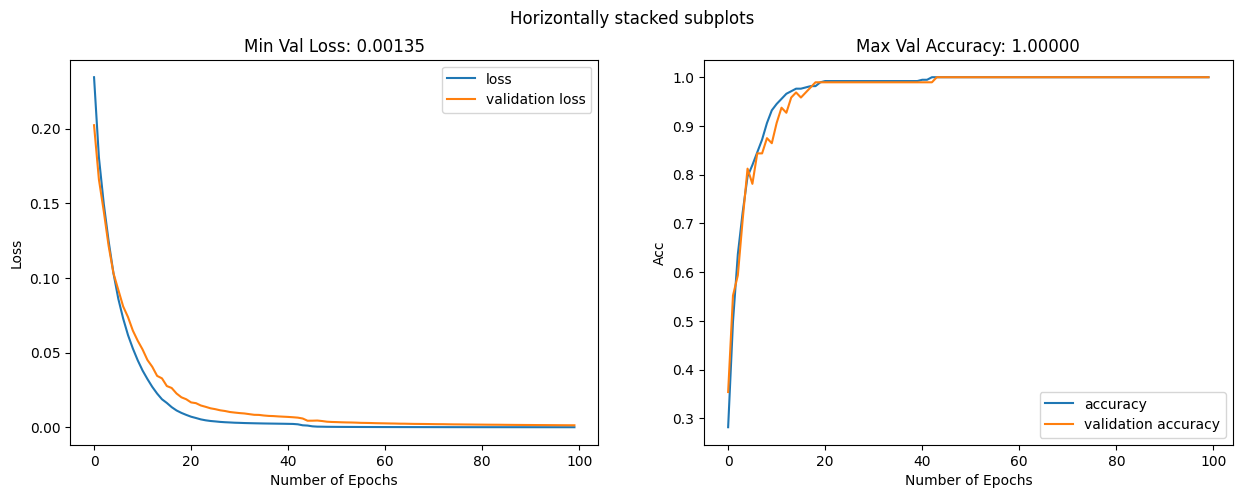

In [24]:
model.evaluate(X_test, y_test)
plot_metrics(history)

# Додаткове: Використання різних методів проектування на площину

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data/MTestData.txt', header=None)
df = df.astype('int')
df[20] = df[20].astype(str)
df[20] = "class" + df[20]
df.columns = df.rename(columns=str).columns

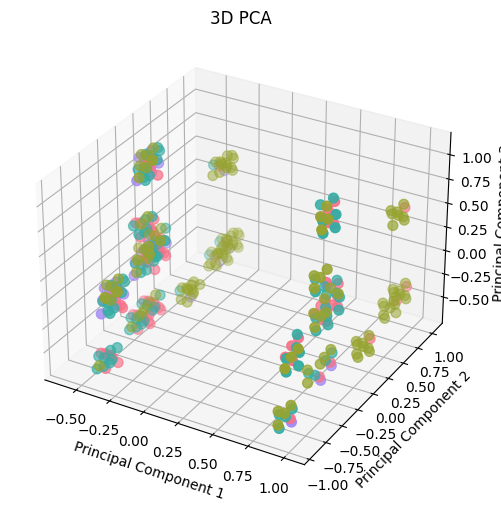

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data from CSV using pandas
data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
data.columns = data.rename(columns=str).columns

# Assume the target column is named 'target'
X = data.drop('20', axis=1)
y = data['20']

# Assuming X contains your feature data

# Perform PCA for 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the principal components with the target variable if available
# For example, if your target variable is in a Series called 'target'
# pc_df = pd.concat([pc_df, data['target']], axis=1)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')

# Replace 'target' with your actual target variable if available
if '20' in data.columns:
    targets = data['20'].unique()
    colors = sns.color_palette("husl", len(targets))

    for target, color in zip(targets, colors):
        indices_to_keep = data['20'] == target
        ax.scatter(pc_df.loc[indices_to_keep, 'PC1'],
                   pc_df.loc[indices_to_keep, 'PC2'],
                   pc_df.loc[indices_to_keep, 'PC3'],
                   color=color,
                   s=50)
else:
    ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c='b', marker='o', s=50)

plt.show()

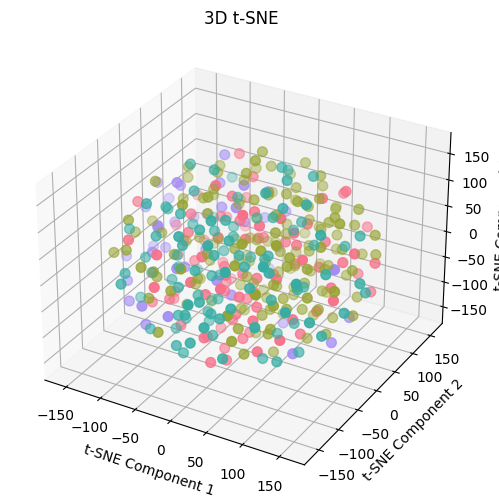

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load data from CSV using pandas
data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
data.columns = data.rename(columns=str).columns

# Assume the target column is named 'target'
X = data.drop('20', axis=1)
y = data['20']

# Assuming X contains your feature data

# Perform t-SNE for 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=5, n_iter=5000, n_iter_without_progress=1000)
tsne_components = tsne.fit_transform(X)

# Create a DataFrame with t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2', 't-SNE3'])

# Concatenate the t-SNE components with the target variable if available
# For example, if your target variable is in a Series called 'target'
# tsne_df = pd.concat([tsne_df, data['target']], axis=1)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE')

# Replace 'target' with your actual target variable if available
if '20' in data.columns:
    targets = data['20'].unique()
    colors = sns.color_palette("husl", len(targets))

    for target, color in zip(targets, colors):
        indices_to_keep = data['20'] == target
        ax.scatter(tsne_df.loc[indices_to_keep, 't-SNE1'],
                   tsne_df.loc[indices_to_keep, 't-SNE2'],
                   tsne_df.loc[indices_to_keep, 't-SNE3'],
                   color=color,
                   s=50)
else:
    ax.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], tsne_df['t-SNE3'], c='b', marker='o', s=50)

plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

# Load data from CSV using pandas
data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
data.columns = data.rename(columns=str).columns

# Assume the target column is named 'target'
X = data.drop('20', axis=1)
y = data['20'].astype(int).astype(str)

# Assuming X contains your feature data

# Perform t-SNE for 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=50, n_iter=5000)
tsne_components = tsne.fit_transform(X)

# Create a DataFrame with t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2', 't-SNE3'])

# Concatenate the t-SNE components with the target variable if available
# For example, if your target variable is in a Series called 'target'
# tsne_df = pd.concat([tsne_df, data['target']], axis=1)

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(tsne_df, x='t-SNE1', y='t-SNE2', z='t-SNE3',
                    labels={'t-SNE1': 't-SNE Component 1',
                            't-SNE2': 't-SNE Component 2',
                            't-SNE3': 't-SNE Component 3'},
                    color=y, # addd from my self
                    title='3D t-SNE Visualization')

# Replace 'target' with your actual target variable if available
if '20' in data.columns:
    # Assuming 'target' is categorical, you can use color='target' for coloring
    fig.update_traces(marker=dict(size=5),
                      selector=dict(mode='markers+text'))
else:
    # If no target variable, use a single color for all data points
    fig.update_traces(marker=dict(size=5, color='blue'),
                      selector=dict(mode='markers+text'))

# Show the interactive plot
fig.show()

# from sklearn.manifold import TSNE
# import plotly.express as px

# df = px.data.iris()

# features = df.loc[:, :'petal_width']

# tsne = TSNE(n_components=3, random_state=0)
# projections = tsne.fit_transform(features, )

# fig = px.scatter_3d(
#     projections, x=0, y=1, z=2,
#     color=df.species, labels={'color': 'species'}
# )
# fig.update_traces(marker_size=8)
# fig.show()

In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
from umap import UMAP
import plotly.express as px

# Load data from CSV using pandas
data = pd.read_csv('/content/drive/MyDrive/data/MTrainData.txt', header=None)
data.columns = data.rename(columns=str).columns

# Assume the target column is named 'target'
X = data.drop('20', axis=1)
y = data['20'].astype(int).astype(str)

# Assuming X contains your feature data

# Perform UMAP for 3 components
umap_model = UMAP(n_components=3, random_state=42)
umap_components = umap_model.fit_transform(X)

# Create a DataFrame with UMAP components
umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Concatenate the UMAP components with the target variable if available
# For example, if your target variable is in a Series called 'target'
# umap_df = pd.concat([umap_df, data['target']], axis=1)

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3',
                    labels={'UMAP1': 'UMAP Component 1',
                            'UMAP2': 'UMAP Component 2',
                            'UMAP3': 'UMAP Component 3'},
                    color=y,
                    title='3D UMAP Visualization')

# Replace 'target' with your actual target variable if available
if 'target' in data.columns:
    # Assuming 'target' is categorical, you can use color='target' for coloring
    fig.update_traces(marker=dict(size=5),
                      selector=dict(mode='markers+text'))
else:
    # If no target variable, use a single color for all data points
    fig.update_traces(marker=dict(size=5, color='blue'),
                      selector=dict(mode='markers+text'))

# Show the interactive plot
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

